In [43]:
import pandas as pd
import numpy as np
import matplotlib as mp
from bs4 import BeautifulSoup
import requests
import os
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from stats import mean, median, mode, multi_mode
%matplotlib notebook
from selenium import webdriver
import shutil

In [8]:
url = "https://www.caffeineinformer.com/the-caffeine-database"

In [9]:
pwd

'C:\\Users\\Ryan\\OneDrive - ogg.com\\DU_class\\Caffeine-Project\\Caffeine'

In [24]:
driver = webdriver.Chrome()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 80


## Setting up chromedriver

In [26]:
executable_path = {'executable_path': 'chromedriver.exe'}

In [27]:
from splinter.browser import Browser

In [28]:
browser = Browser('chrome',**executable_path,headless=False)

In [29]:
browser.visit(url)

In [30]:
html = browser.html

## Setting up Beautiful soup to scrape

In [31]:
from bs4 import BeautifulSoup
import requests

In [32]:
response = requests.get(url)

In [33]:
soup = BeautifulSoup(html, 'html.parser')

In [15]:
print(soup.prettify())

<html class="js-drop">
 <head>
  <link href="/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon-32x32.png" rel="icon" type="images/png"/>
  <title>
   Caffeine Content of Drinks
  </title>
  <meta content="Caffeine amounts for over 700 drinks including energy drinks, sodas, coffees, and teas. Which drinks have the most caffeine and which pose a safety risk? " name="description"/>
  <link href="//www.caffeineinformer.com/wp-content/cache/wpfc-minified/6wx4115d/46x4a.css" rel="stylesheet"/>
  <link as="font" crossorigin="" href="/wp-content/themes/ci1/fonts/merriweather-v19-latin-regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/wp-content/themes/ci1/fonts/roboto-v18-latin-regular.woff2" rel="preload" type="font/woff2"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <link as="image" href="//cdn.caffeineinformer.com/wp-content/themes/ci1/img/caffeineinformer@2x.png" rel="preload"/>
  <l

In [16]:
results = soup.select('div.dataTables_scrollBody table.display.dataTable tbody tr td.n')
print(results)

[<td class="n"><a href="/caffeine-content/10-hour-eternal-shot">10 Hour Energy Shot</a></td>, <td class="n"><a href="/caffeine-content/28-energy-drink-black-white">28 Black Energy Drink</a></td>, <td class="n"><a href="/caffeine-content/3-caffeine-water">3 Water </a></td>, <td class="n"><a href="/caffeine-content/3d-energy-drink">3D Energy Drink</a></td>, <td class="n"><a href="/caffeine-content/4-purpose">4 Purpose Energy Drink</a></td>, <td class="n"><a href="/caffeine-content/4c-energy-water-enhancers">4C Energy Liquid Water Enhancers</a></td>, <td class="n"><a href="/caffeine-content/4-c-energy-rush">4C Energy Rush</a></td>, <td class="n"><a href="/caffeine-content/5-hour-energy">5 Hour Energy</a></td>, <td class="n"><a href="/caffeine-content/5-hour-decaf">5 Hour Energy Decaf</a></td>, <td class="n"><a href="/caffeine-content/5-hour-extra-strength">5 Hour Energy Extra Strength</a></td>, <td class="n"><a href="/caffeine-content/7-eleven-brewed-coffee">7 Eleven Brewed Coffee</a></td

In [17]:
urls = []
for result in results:
    tablerows = result.find('a')
    hrefs = tablerows['href']
    full_url = "https://www.caffeineinformer.com"+hrefs
    urls.append(full_url)
print(urls)

['https://www.caffeineinformer.com/caffeine-content/10-hour-eternal-shot', 'https://www.caffeineinformer.com/caffeine-content/28-energy-drink-black-white', 'https://www.caffeineinformer.com/caffeine-content/3-caffeine-water', 'https://www.caffeineinformer.com/caffeine-content/3d-energy-drink', 'https://www.caffeineinformer.com/caffeine-content/4-purpose', 'https://www.caffeineinformer.com/caffeine-content/4c-energy-water-enhancers', 'https://www.caffeineinformer.com/caffeine-content/4-c-energy-rush', 'https://www.caffeineinformer.com/caffeine-content/5-hour-energy', 'https://www.caffeineinformer.com/caffeine-content/5-hour-decaf', 'https://www.caffeineinformer.com/caffeine-content/5-hour-extra-strength', 'https://www.caffeineinformer.com/caffeine-content/7-eleven-brewed-coffee', 'https://www.caffeineinformer.com/caffeine-content/7-eleven-coffee-energy', 'https://www.caffeineinformer.com/caffeine-content/7-eleven-energy-shot', 'https://www.caffeineinformer.com/caffeine-content/7-up', 'h

In [18]:
results

[<td class="n"><a href="/caffeine-content/10-hour-eternal-shot">10 Hour Energy Shot</a></td>,
 <td class="n"><a href="/caffeine-content/28-energy-drink-black-white">28 Black Energy Drink</a></td>,
 <td class="n"><a href="/caffeine-content/3-caffeine-water">3 Water </a></td>,
 <td class="n"><a href="/caffeine-content/3d-energy-drink">3D Energy Drink</a></td>,
 <td class="n"><a href="/caffeine-content/4-purpose">4 Purpose Energy Drink</a></td>,
 <td class="n"><a href="/caffeine-content/4c-energy-water-enhancers">4C Energy Liquid Water Enhancers</a></td>,
 <td class="n"><a href="/caffeine-content/4-c-energy-rush">4C Energy Rush</a></td>,
 <td class="n"><a href="/caffeine-content/5-hour-energy">5 Hour Energy</a></td>,
 <td class="n"><a href="/caffeine-content/5-hour-decaf">5 Hour Energy Decaf</a></td>,
 <td class="n"><a href="/caffeine-content/5-hour-extra-strength">5 Hour Energy Extra Strength</a></td>,
 <td class="n"><a href="/caffeine-content/7-eleven-brewed-coffee">7 Eleven Brewed Coff

In [19]:
drinkNames = []

for r in results:
    tds = r.find('a')
    dn = tds.string
    drinkNames.append(dn)
    
print(drinkNames)

['10 Hour Energy Shot', '28 Black Energy Drink', '3 Water ', '3D Energy Drink', '4 Purpose Energy Drink', '4C Energy Liquid Water Enhancers', '4C Energy Rush', '5 Hour Energy', '5 Hour Energy Decaf', '5 Hour Energy Extra Strength', '7 Eleven Brewed Coffee', '7 Select Coffee Energy Shot', '7-Eleven Energy Shot', '7-Up', 'A&W Cream Soda', 'A&W Root Beer', 'ABB Turbo Tea', 'Ace Energy Drink', 'Acute Fruit Energy Drink', 'Adrenaline Shoc', 'Advocare Slam Energy Shot', 'Advocare Slim', 'Afri Cola', 'AHA Sparkling Water', 'Ale 8 1', 'Alpine Start Instant Coffee', 'Alsa Energy Drink', 'Americano Coffee', 'Amp Energy Cherry Blast', 'Amp Energy Drink', 'Amp Strawberry Limeade', 'Arbonne Energy Fizz Stck', "Arby's Jamocha Shake", 'Archer Farms Energy Drink', 'Arizona Arnold Palmer Half and Half', 'Arizona Energy Drink Rx', 'Arizona Iced Tea', 'Arizona Natural Energy', 'Avitae Caffeinated Water', 'AXIO Energy Drink', 'B 63 Energy Drink', 'Bai Antioxidant Infusion', 'BANG Energy Drink', 'Barista B

In [20]:
tableDetail = soup.select('div.dataTables_scrollBody table.display.dataTable tbody')
print(tableDetail)

[<tbody aria-live="polite" aria-relevant="all" role="alert"><tr class="odd"><td class="n"><a href="/caffeine-content/10-hour-eternal-shot">10 Hour Energy Shot</a></td><td class="">1.93</td><td class="">422</td><td class="">218.7</td></tr><tr class="even"><td class="n"><a href="/caffeine-content/28-energy-drink-black-white">28 Black Energy Drink</a></td><td class="">8.46</td><td class="">80</td><td class="">9.5</td></tr><tr class="odd"><td class="n"><a href="/caffeine-content/3-caffeine-water">3 Water </a></td><td class="">16.9</td><td class="">50</td><td class="">3.0</td></tr><tr class="even"><td class="n"><a href="/caffeine-content/3d-energy-drink">3D Energy Drink</a></td><td class="">16</td><td class="">200</td><td class="">12.5</td></tr><tr class="odd"><td class="n"><a href="/caffeine-content/4-purpose">4 Purpose Energy Drink</a></td><td class="">8.46</td><td class="">70</td><td class="">8.3</td></tr><tr class="even"><td class="n"><a href="/caffeine-content/4c-energy-water-enhancers

In [21]:
for t in tableDetail:
    tr = t.find_all('tr')
    print(tr)

[<tr class="odd"><td class="n"><a href="/caffeine-content/10-hour-eternal-shot">10 Hour Energy Shot</a></td><td class="">1.93</td><td class="">422</td><td class="">218.7</td></tr>, <tr class="even"><td class="n"><a href="/caffeine-content/28-energy-drink-black-white">28 Black Energy Drink</a></td><td class="">8.46</td><td class="">80</td><td class="">9.5</td></tr>, <tr class="odd"><td class="n"><a href="/caffeine-content/3-caffeine-water">3 Water </a></td><td class="">16.9</td><td class="">50</td><td class="">3.0</td></tr>, <tr class="even"><td class="n"><a href="/caffeine-content/3d-energy-drink">3D Energy Drink</a></td><td class="">16</td><td class="">200</td><td class="">12.5</td></tr>, <tr class="odd"><td class="n"><a href="/caffeine-content/4-purpose">4 Purpose Energy Drink</a></td><td class="">8.46</td><td class="">70</td><td class="">8.3</td></tr>, <tr class="even"><td class="n"><a href="/caffeine-content/4c-energy-water-enhancers">4C Energy Liquid Water Enhancers</a></td><td cl

In [22]:
fluid_oz = []
caffeine = []
mgp_fl = []

for t in tr:
    td = t.find_all('td')
    floz = td[1]
    caff = td[2]
    mgperfl = td[3]
    print(floz.string)
    fluid_oz.append(floz.string)
    caffeine.append(caff.string)
    mgp_fl.append(mgperfl.string)

1.93
8.46
16.9
16
8.46
8
8
2
2
2
16
2
2
12
12
12
18
16
15.5
16
2
8
12
12
12
8
16
12
16
16
16
8
16
12
23
11.5
20
15.5
16.9
12
8.46
18
16
16.91
12
12
24
11.2
15
10
16
16
10
16
2
16
8.46
8
16
16
12
8
8
8
16
16
2
16
16
16
12
12
16
8.46
12
12
11
3.4
8.4
8.46
8.46
8.46
8.46
8.46
8.4
8.46
8
8.4
13.7
14
8
12
8
16.91
8.46
16
12
8
12
13.7
12
12
10
16
12
8.46
12
12
11.16
11.5
16
11.5
8
12
16
8
6
10
8
12
12
24
12
12
10
14
14
16
8
6
8.4
6.77
1.2
16.91
16.91
12
12
12
12
8.4
2
8
8
8
16
12
8
6
12
10
8.69
10
8.43
8
16
16
16
8
20
16.91
13.7
16.91
12
8
12
11
8
16.91
2.03
16
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12.01
12
12
12
18
12
12
20
8
12
12
12
12
12
8
6
12
9
8.1
24
14
24
14
24
24
24
14
14
24
8.4
20
2
8
2
12
8
8
16
16
16.9
8.46
12
8
1.5
1.93
8.46
20
8.46
12.52
12
8
12
12
8.46
11.15
8
12
2
2
12
11.16
11
16
8
16.9
20
16
12
16.9
16.9
12
2.028
16
16
11.5
8
18.5
1.35
8
16
2
8.46
16
16
2
16
8
12
12
8.4
2.5
11.5
2
16
16
16.9
8
16
8
8
12
16
16.9
8
16
8.46
12
6.8
16
8
15.5
8
11.16
2.03
2.03
2.03
8.46
1

In [23]:
print(len(fluid_oz))

777


In [24]:
print(len(fluid_oz),len(caffeine),len(mgp_fl),len(drinkNames),len(urls))

777 777 777 777 777


In [25]:
data = pd.DataFrame({
    'Drinks': drinkNames,
    'Caffeine Content(mg)': caffeine,
    'Fluid OZ':fluid_oz,
    'MG per FLOZ': mgp_fl,
    'URL': urls
})
drinks = data.set_index('Drinks')
drinks

,Caffeine Content(mg),Fluid OZ,MG per FLOZ,URL
Drinks,,,,
10 Hour Energy Shot,422,1.93,218.7,https://www.caffeineinformer.com/caffeine-cont...
28 Black Energy Drink,80,8.46,9.5,https://www.caffeineinformer.com/caffeine-cont...
3 Water,50,16.9,3.0,https://www.caffeineinformer.com/caffeine-cont...
3D Energy Drink,200,16,12.5,https://www.caffeineinformer.com/caffeine-cont...
4 Purpose Energy Drink,70,8.46,8.3,https://www.caffeineinformer.com/caffeine-cont...
...,...,...,...,...
ZipFizz Energy Drink,100,16,6.2,https://www.caffeineinformer.com/caffeine-cont...
Zola Coconut Water Espresso,125,17.5,7.1,https://www.caffeineinformer.com/caffeine-cont...
Zola Organic Hydrating Energy Drink,120,12,10.0,https://www.caffeineinformer.com/caffeine-cont...


In [26]:
drinks.dtypes

Caffeine Content(mg)    object
Fluid OZ                object
MG per FLOZ             object
URL                     object
dtype: object

In [27]:
new_drinks = drinks.astype({'Caffeine Content(mg)':'int64','Fluid OZ':'float64','MG per FLOZ':'float64'})
new_drinks.dtypes

Caffeine Content(mg)      int64
Fluid OZ                float64
MG per FLOZ             float64
URL                      object
dtype: object

In [28]:
top10_caff = new_drinks.nlargest(10,'Caffeine Content(mg)')
top10_caff

,Caffeine Content(mg),Fluid OZ,MG per FLOZ,URL
Drinks,,,,
Black Label Brewed Coffee,1555,12.0,129.6,https://www.caffeineinformer.com/caffeine-cont...
Very Strong Coffee,1350,12.0,112.5,https://www.caffeineinformer.com/caffeine-cont...
Taft Coffee,1182,12.0,98.5,https://www.caffeineinformer.com/caffeine-cont...
High Voltage Coffee,1150,12.0,95.8,https://www.caffeineinformer.com/caffeine-cont...
Black Insomnia Coffee,1105,12.0,92.1,https://www.caffeineinformer.com/caffeine-cont...
Cannonball Coffee Maximum Charge,1101,12.0,91.8,https://www.caffeineinformer.com/caffeine-cont...
Biohazard Coffee,928,12.0,77.3,https://www.caffeineinformer.com/caffeine-cont...
Coffee Crave Fearless Black,844,12.0,70.3,https://www.caffeineinformer.com/caffeine-cont...
Bizzy Cold Brew,750,16.0,46.9,https://www.caffeineinformer.com/caffeine-cont...


In [47]:
top10_caff.index

Index(['Black Label Brewed Coffee', 'Very Strong Coffee', 'Taft Coffee',
       'High Voltage Coffee', 'Black Insomnia Coffee',
       'Cannonball Coffee Maximum Charge', 'Biohazard Coffee',
       'Coffee Crave Fearless Black', 'Bizzy Cold Brew', 'Death Wish Coffee'],
      dtype='object', name='Drinks')

In [64]:
min(top10_caff['Caffeine Content(mg)'])

728

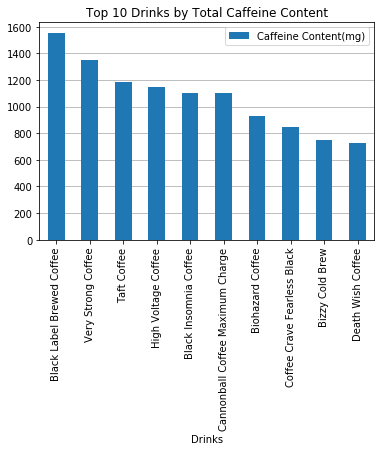

In [80]:
top10 = top10_caff.plot(y='Caffeine Content(mg)',kind='bar',title="Top 10 Drinks by Total Caffeine Content",zorder=5)
plt.grid(axis='y',zorder=1)
plt.savefig("top10.png",bbox_inches='tight')

In [72]:
top10_fl_oz = new_drinks.nlargest(10,'Fluid OZ')
top10_fl_oz

,Caffeine Content(mg),Fluid OZ,MG per FLOZ,URL
Drinks,,,,
Starbucks Classics Caffe Mocha,510,48.0,10.6,https://www.caffeineinformer.com/caffeine-cont...
McDonalds Sweet Tea,100,32.0,3.1,https://www.caffeineinformer.com/caffeine-cont...
Baskin Robbins Cappuccino Blast,234,24.0,9.8,https://www.caffeineinformer.com/caffeine-cont...
Cheetah Power Surge,0,24.0,0.0,https://www.caffeineinformer.com/caffeine-cont...
Dunkin' Cold Brew,260,24.0,10.8,https://www.caffeineinformer.com/caffeine-cont...
Dunkin' Donuts Coolatta,18,24.0,0.8,https://www.caffeineinformer.com/caffeine-cont...
Dunkin' Donuts Iced Coffee,297,24.0,12.4,https://www.caffeineinformer.com/caffeine-cont...
Dunkin' Donuts Iced Latte,151,24.0,6.3,https://www.caffeineinformer.com/caffeine-cont...
Dunkin' Donuts Iced Tea,67,24.0,2.8,https://www.caffeineinformer.com/caffeine-cont...


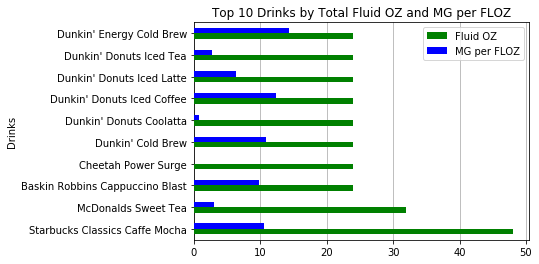

In [79]:
top10_fl_oz.plot(kind='barh',color=['g','b'],y=['Fluid OZ','MG per FLOZ'],title="Top 10 Drinks by Total Fluid OZ and MG per FLOZ",zorder=5)
plt.grid(axis='x',zorder=1)
plt.savefig("Top10fluidOZ.png",bbox_inches='tight')

In [74]:
top10_MGFLOZ = new_drinks.nlargest(10,'MG per FLOZ')
top10_MGFLOZ

,Caffeine Content(mg),Fluid OZ,MG per FLOZ,URL
Drinks,,,,
Liquid Caffeine,500,1.00,500.0,https://www.caffeineinformer.com/caffeine-cont...
Vital 4U Liquid Energy,155,0.50,310.0,https://www.caffeineinformer.com/caffeine-cont...
Screamin Energy Max Hit,185,0.61,303.3,https://www.caffeineinformer.com/caffeine-cont...
Kaffn8 Liquified Caffeine,75,0.25,300.0,https://www.caffeineinformer.com/caffeine-cont...
10 Hour Energy Shot,422,1.93,218.7,https://www.caffeineinformer.com/caffeine-cont...
X-Mode Energy Shot,150,1.00,150.0,https://www.caffeineinformer.com/caffeine-cont...
Cocaine Energy Shot,280,2.00,140.0,https://www.caffeineinformer.com/caffeine-cont...
Phoenix Energy Shot,280,2.00,140.0,https://www.caffeineinformer.com/caffeine-cont...
Redline Power Rush,350,2.50,140.0,https://www.caffeineinformer.com/caffeine-cont...


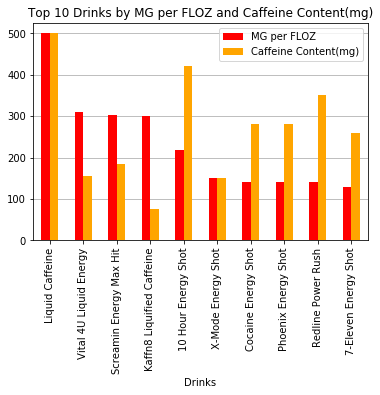

In [78]:
top10_MGFLOZ.plot(kind='bar',color=['r','orange'],y=['MG per FLOZ','Caffeine Content(mg)'],title="Top 10 Drinks by MG per FLOZ and Caffeine Content(mg)",zorder=5)
plt.grid(axis='y',zorder=1)
plt.savefig("Top10mgperflcaff.png",bbox_inches='tight')

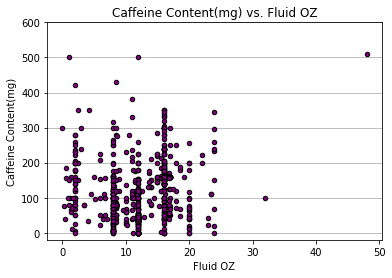

In [101]:
new_drinks.plot(kind='scatter', color='purple',y='Caffeine Content(mg)',x='Fluid OZ',marker="o",edgecolors="black",title="Caffeine Content(mg) vs. Fluid OZ",zorder=5)
plt.ylim(-20,600)
plt.grid(axis='y',zorder=0)
plt.savefig("Caffeinevfloz.png",bbox_inches='tight')

In [127]:
Caffeine_contentlist = np.array(new_drinks['Caffeine Content(mg)'])
mid = median(Caffeine_contentlist)
mid

100

In [136]:
minimum = min(Caffeine_contentlist)
minimum

0

In [137]:
maximum = max(Caffeine_contentlist)
maximum

1555

In [128]:
q1 = np.percentile(Caffeine_contentlist,25)
q3 = np.percentile(Caffeine_contentlist,75)
q1,q3

(50.0, 160.0)

In [129]:
iqr = (q3-q1)
iqr

110.0

In [130]:
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

-115.0

In [131]:
upper_boundary = q3 + (1.5 *iqr)
upper_boundary

325.0

In [132]:
Caffeine_contentlist[Caffeine_contentlist <= lower_boundary]

array([], dtype=int64)

In [133]:
Caffeine_contentlist[Caffeine_contentlist >= upper_boundary]

array([ 330,  330,  333,  340,  344,  345,  350,  350,  350,  350,  381,
        422,  430,  500,  500,  510,  728,  750,  844,  928, 1101, 1105,
       1150, 1182, 1350, 1555], dtype=int64)

<IPython.core.display.Javascript object>


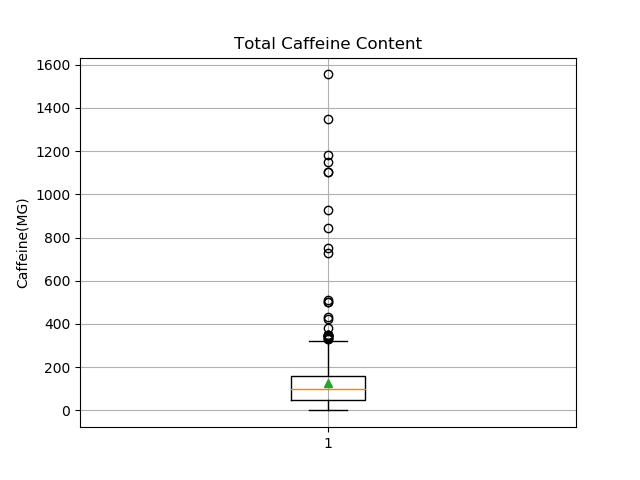

In [149]:
plt.boxplot(Caffeine_contentlist,showmeans=True,conf_intervals=[[lower_boundary,upper_boundary]])
plt.grid()
plt.title("Total Caffeine Content")
plt.ylabel("Caffeine(MG)")
plt.savefig("Boxplot.png",bbox_inches='tight')

In [186]:
print(html)

<html class="js-drop"><head><script async="" src="//confiant-integrations.global.ssl.fastly.net/prebid/202003301902/wrap.js"></script><script async="" src="//confiant-integrations.global.ssl.fastly.net/gpt/202003301902/wrap.js"></script><script async="" type="text/javascript" src="https://confiant-integrations.global.ssl.fastly.net/d5CEaYYEzMwqV3dGpQ3IFjCM27s/gpt_and_prebid/config.js"></script><script async="" src="//c.amazon-adsystem.com/aax2/apstag.js"></script><script async="async" src="https://ad-delivery.net/beacon.js" id="sf3f7aqlkq"></script><script type="text/javascript">

(function() {
	if(typeof amzn_assoc_utils==="undefined"){amzn_assoc_utils={};}if(typeof amzn_assoc_utils.parse==="undefined"){amzn_assoc_utils.parse=(function(){var d,b,a={'"':'"',"\\":"\\","/":"/",b:"\b",f:"\f",n:"\n",r:"\r",t:"\t"},m,k=function(n){throw {name:"SyntaxError",message:n,at:d,text:m};},g=function(n){if(n&&n!==b){k("Expected '"+n+"' instead of '"+b+"'");}b=m.charAt(d);d+=1;return b;},f=function()

In [34]:
class Error(Exception):
#    """Base class for other exceptions"""
   pass
class PageBrokenError(Error):
#     """Erro to catch a broken page"""
    pass

In [188]:
urls_content=[]
links = browser.find_by_tag("td.n a")
print(len(links))
for i in range(len(links)):
    url = {}
    browser.find_by_tag("td.n a")[i].click()
    caffeine_str = browser.find_by_css("div.dialwrap.strength.hi")
    caffeine_low = browser.find_by_css("div.dialwrap.strength.lo")
    caffeine_med = browser.find_by_css("div.dialwrap.strength.med")
    try:
        if (caffeine_str):
            url['text'] = caffeine_str.text
        elif (caffeine_med):
            url['text'] = caffeine_med.text
        else:
            url['text'] = caffeine_low.text
        url['item_img'] = browser.find_by_css('img.dialimg')['src']
        url['drink_name'] = browser.find_by_tag('h1').text
        urls_content.append(url)
        browser.back()
    except PageBrokenError:
        print("Page doesn't work")

774


In [189]:
urls_content

[{'text': 'DANGEROUS\nWarning: This drink has very high levels of caffeine.',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/10-hour-eternal-shot.jpg',
  'drink_name': '10 Hour Energy Shot'},
 {'text': 'MODERATE',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/28-energy-drink-black-white.jpg',
  'drink_name': '28 Black Energy Drink'},
 {'text': 'MODERATE',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/3-caffeine-water.jpg',
  'drink_name': '3 Water'},
 {'text': 'VERY HIGH\nWarning: This drink has very high levels of caffeine.',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/3d-energy-drink.jpg',
  'drink_name': '3D Energy Drink'},
 {'text': 'MODERATE',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/4-purpose.jpg',
  'drink_name': ''},
 {'text': 'MODERATE',
  'item_img': 'https://cdn.caffeineinformer.com/wp-content/caffeine/4c-energy-water-enhancers.jpg',
  'drink_name': '4C Energy 

In [190]:
len(urls_content)

774

In [191]:
df = pd.DataFrame(urls_content)
df.head()

,text,item_img,drink_name
0,DANGEROUS\nWarning: This drink has very high l...,https://cdn.caffeineinformer.com/wp-content/ca...,10 Hour Energy Shot
1,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,28 Black Energy Drink
2,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,3 Water
3,VERY HIGH\nWarning: This drink has very high l...,https://cdn.caffeineinformer.com/wp-content/ca...,3D Energy Drink
4,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,


In [192]:
df.dtypes

text          object
item_img      object
drink_name    object
dtype: object

In [193]:
df['text'] = df['text'].str.replace('\n',' ')

In [194]:
df.head()

,text,item_img,drink_name
0,DANGEROUS Warning: This drink has very high le...,https://cdn.caffeineinformer.com/wp-content/ca...,10 Hour Energy Shot
1,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,28 Black Energy Drink
2,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,3 Water
3,VERY HIGH Warning: This drink has very high le...,https://cdn.caffeineinformer.com/wp-content/ca...,3D Energy Drink
4,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,


In [195]:
df['text'] = df['text'].str.replace('Warning: This drink has very high levels of caffeine.','')

In [196]:
df.head()

,text,item_img,drink_name
0,DANGEROUS,https://cdn.caffeineinformer.com/wp-content/ca...,10 Hour Energy Shot
1,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,28 Black Energy Drink
2,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,3 Water
3,VERY HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,3D Energy Drink
4,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,


In [197]:
df.rename(columns={"drink_name":"Drink Name","text": "Caffeine Strength", "item_img": "Drink Image"})

,Caffeine Strength,Drink Image,Drink Name
0,DANGEROUS,https://cdn.caffeineinformer.com/wp-content/ca...,10 Hour Energy Shot
1,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,28 Black Energy Drink
2,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,3 Water
3,VERY HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,3D Energy Drink
4,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,
...,...,...,...
769,HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,ZipFizz Energy Drink
770,HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,Zola Coconut Water Espresso
771,HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,Zola Organic Hydrating Energy Drink
772,HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,Zola Sparkling Energy Water


In [200]:
df.head()

,text,item_img,drink_name
0,DANGEROUS,https://cdn.caffeineinformer.com/wp-content/ca...,10 Hour Energy Shot
1,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,28 Black Energy Drink
2,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,3 Water
3,VERY HIGH,https://cdn.caffeineinformer.com/wp-content/ca...,3D Energy Drink
4,MODERATE,https://cdn.caffeineinformer.com/wp-content/ca...,


In [201]:
df.to_csv("Caffeine_intensity.csv",index=False)

In [204]:
drinks.to_csv("All_drink_info.csv",index=True)

In [144]:
executable_path = {'executable_path': 'chromedriver.exe'}

In [145]:
from splinter.browser import Browser

In [146]:
browser = Browser('chrome',**executable_path,headless=False)

In [147]:
browser.visit(url)

In [148]:
html = browser.html

In [149]:
response = requests.get(url)

In [150]:
soup = BeautifulSoup(html, 'html.parser')

In [151]:
page = browser.find_by_css("div.aside a.aside-link-title.first").first.click()   

In [251]:
supplements = []
mg_serving = []
caff_source = []

html= browser.html
soup = BeautifulSoup(html,'html.parser')
supps = soup.select('table.datatable tbody tr')
for s in supps:
    tds = s.select('td')
    supplement = tds[0]
    mg_s = tds[1]
    cs = tds[2]
    supplements.append(supplement.string)
    mg_serving.append(mg_s.string)
    caff_source.append(cs.string)    

In [250]:
print(supplements)

['ABB Speed Stacked Pumped', 'About Time AUX', 'BANG Energy Drink', 'Hyde Power Potion', 'BPI B4', 'Adrenaline Shoc', 'BSN Endo Rush', 'Raze', 'Celsius Heat', 'BSN N.O. Xplode 2.0', 'Reign Total Body Fuel', 'Rockstar Xdurance', 'Speed Stack', 'Cellucor C4 Extreme', 'Cellucor C4 Pre-Workout', 'Cellucor C4 Ripped', 'Nitro Surge', 'Insane labs Psychotic', 'Promix P', 'Evolution Nutrition ENGN', 'Naked Energy Pre-workout', 'DyNo by RSP Nutrition', 'EndurElite PerformElite', 'Vintage Blast Pre-workout', 'GAT Nitraflex', 'GNC Hyper-Ripped', 'Legion Pulse', 'IdealLean Pre-Workout', 'iForce Maximize Intense', 'Pre-Kaged', 'Beyond Raw LIT', 'Six Star Explosion', 'Mr. Hyde Icon', 'Mr. Hyde by Pro Supps', 'Mr. Hyde Nitro X', 'Muscle Marinade', 'Muscle Pharm Assault', 'MuscleTech Neurocore', 'Transparent Labs Lean', 'NANO Vaporx5 ', 'RARI Nutrition Infinity', 'Octane Energy/Sports Drink', 'ON Gold Standard Preworkout', 'ON AMIN.O. Energy', 'Oxyelite Pro', 'Pre JYM', 'Redline RTD', 'Cobra Labs The 

In [253]:
data_s = pd.DataFrame({
    'Supplement': supplements,
    'Caffeine_mg_serving': mg_serving,
    'Caffeine_source':caff_source,
})
supps_finish = data_s.set_index('Supplement')
supps_finish.head()


,Caffeine_mg_serving,Caffeine_source
Supplement,,
ABB Speed Stacked Pumped,300/bottle,"Caffeine Anhydrous, Guarana"
About Time AUX,60/scoop,"Yerba Mate’, Guarana, Green Tea"
BANG Energy Drink,300/can,Caffeine Anhydrous
Hyde Power Potion,350/can,Caffeine Anhydrous
BPI B4,300/capsule*,Caffeine Anhydrous


In [254]:
supps_finish.to_csv("Workout Supps.csv")

## Food, Gum and Medication

In [3]:
Gum = "https://www.caffeineinformer.com/efs-guide-to-caffeine-gum"
FNM = "https://www.caffeineinformer.com/caffeine-in-candy"

In [4]:
response = requests.get(Gum)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <link href="/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon-32x32.png" rel="icon" type="images/png"/>
  <meta name="ir-site-verification-token" value="-1714523169"/>
  <title>
   Guide to Caffeinated Gum: Varieties, Price, and Caffeine Levels
  </title>
  <meta content="Energy gum caffeine content, flavor, and the price of 30 popular caffeine chewing gums available as well as their limitations and dangers." name="description"/>
  <link href="//www.caffeineinformer.com/wp-content/cache/wpfc-minified/6wx4115d/46x4a.css" rel="stylesheet">
   <link as="font" crossorigin="" href="/wp-content/themes/ci1/fonts/merriweather-v19-latin-regular.woff2" rel="preload" type="font/woff2">
    <link as="font" crossorigin="" href="/wp-content/themes/ci1/fonts/roboto-v18-latin-regular.woff2" rel="preload" type="font/woff2"/>
    <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
    <link as="image" href="/wp-cont

In [7]:
table = soup.select('table.datatable')
print(table)

[<table border="0" cellpadding="0" cellspacing="0" class="datatable" style="height: 814px;">
<thead>
<tr style="height: 22px;">
<th style="height: 22px; width: 200px;"></th>
<th style="height: 22px; width: 104px;"><strong>Caffeine/piece</strong></th>
<th style="height: 22px; width: 218px;"><strong>Flavor</strong></th>
<th style="height: 22px; width: 89px;"><strong>Price/pack</strong></th>
</tr>
</thead>
<tbody>
<tr style="height: 44px;">
<td style="height: 44px; width: 200px;"><a href="https://www.caffeineinformer.com/caffeine-content/stay-alert-us-army">Military Energy Gum</a><br/>
(Formerly Stay Alert Gum)</td>
<td style="height: 44px; width: 104px;">100mg</td>
<td style="height: 44px; width: 218px;">mint, cinnamon</td>
<td style="height: 44px; width: 89px;">$1.28</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px; width: 200px;"><a href="http://www.apolloenergygum.com/">Apollo Energy Gum</a></td>
<td style="height: 22px; width: 104px;">80mg</td>
<td style="height: 22px; w

In [8]:
for t in table:
    rows = t.select('tr')
    print(rows)

[<tr style="height: 22px;">
<th style="height: 22px; width: 200px;"></th>
<th style="height: 22px; width: 104px;"><strong>Caffeine/piece</strong></th>
<th style="height: 22px; width: 218px;"><strong>Flavor</strong></th>
<th style="height: 22px; width: 89px;"><strong>Price/pack</strong></th>
</tr>, <tr style="height: 44px;">
<td style="height: 44px; width: 200px;"><a href="https://www.caffeineinformer.com/caffeine-content/stay-alert-us-army">Military Energy Gum</a><br/>
(Formerly Stay Alert Gum)</td>
<td style="height: 44px; width: 104px;">100mg</td>
<td style="height: 44px; width: 218px;">mint, cinnamon</td>
<td style="height: 44px; width: 89px;">$1.28</td>
</tr>, <tr style="height: 22px;">
<td style="height: 22px; width: 200px;"><a href="http://www.apolloenergygum.com/">Apollo Energy Gum</a></td>
<td style="height: 22px; width: 104px;">80mg</td>
<td style="height: 22px; width: 218px;">spearmint</td>
<td style="height: 22px; width: 89px;">$2.60</td>
</tr>, <tr style="height: 22px;">
<t

In [9]:
row1 = rows[0]
header1 = row1.select('th')[1].string
header2 = row1.select('th')[2].string
header3 = row1.select('th')[3].string

In [10]:
class Error(Exception):
#    """Base class for other exceptions"""
   pass
class MissingUrl(Error):
    pass

In [11]:
results = soup.select('table.datatable tbody tr')
print(results)

[<tr style="height: 44px;">
<td style="height: 44px; width: 200px;"><a href="https://www.caffeineinformer.com/caffeine-content/stay-alert-us-army">Military Energy Gum</a><br/>
(Formerly Stay Alert Gum)</td>
<td style="height: 44px; width: 104px;">100mg</td>
<td style="height: 44px; width: 218px;">mint, cinnamon</td>
<td style="height: 44px; width: 89px;">$1.28</td>
</tr>, <tr style="height: 22px;">
<td style="height: 22px; width: 200px;"><a href="http://www.apolloenergygum.com/">Apollo Energy Gum</a></td>
<td style="height: 22px; width: 104px;">80mg</td>
<td style="height: 22px; width: 218px;">spearmint</td>
<td style="height: 22px; width: 89px;">$2.60</td>
</tr>, <tr style="height: 22px;">
<td style="height: 22px; width: 200px;"><del>Blitz Energy Gum</del></td>
<td style="height: 22px; width: 104px;">55mg</td>
<td style="height: 22px; width: 218px;">mint original</td>
<td style="height: 22px; width: 89px;">$2.45</td>
</tr>, <tr style="height: 22px;">
<td style="height: 22px; width: 20

In [12]:
gum = []
caffperpiece = []
flavor = []
priceperpk = []
urls = []

for r in results:
    tds = r.select('td')
    url = tds[0]
    hrefs = url.find_all('a',href=True)
    if not (hrefs):
        urls.append("None")
    else:
        for h in hrefs:
            u = h['href']
            if u.startswith('/'):
                new_u = "https://www.caffeineinformer.com"+ u
                urls.append(new_u)
            else:
                urls.append(u)
    g = tds[0].text
    cpp = tds[1].text
    fl = tds[2].text
    ppp = tds[3].text
    
    gum.append(g)
    caffperpiece.append(cpp)
    flavor.append(fl)
    priceperpk.append(ppp)
    

In [13]:
print(len(urls),len(gum),len(flavor),len(priceperpk))

35 35 35 35


In [14]:
gum_df = pd.DataFrame({
    "Gum_name": gum,
    "Caff_per_piece": caffperpiece,
    "Flavor": flavor,
    "Price_per_pack": priceperpk,
    "Page_url": urls
})
gum_df

,Gum_name,Caff_per_piece,Flavor,Price_per_pack,Page_url
0,Military Energy Gum\n(Formerly Stay Alert Gum),100mg,"mint, cinnamon",$1.28,https://www.caffeineinformer.com/caffeine-cont...
1,Apollo Energy Gum,80mg,spearmint,$2.60,http://www.apolloenergygum.com/
2,Blitz Energy Gum,55mg,mint original,$2.45,None
3,X8 Energy Gum,50mg,mint,$4.99,https://www.caffeineinformer.com/caffeine-cont...
4,Jolt Gum,45mg,mint,$2.49,https://www.caffeineinformer.com/caffeine-cont...
5,Vibe Energy Gum,40.5mg,mint,$3.99,https://www.caffeineinformer.com/vibe-energy-gum
6,RockStar Gum,40mg,"mint, orange",$1.99,None
7,Amp Energy Gum,40mg,citrus,$2.99,None
8,Mad Croc Gum,40mg,"peppermint, cinnamon",$2.12,https://www.caffeineinformer.com/caffeine-cont...
9,Mini Thin Rush Gum,40mg,"spearmint, cinnamon",$1.99,None


In [479]:
response_food = requests.get(FNM)
soup = BeautifulSoup(response_food.text,'html.parser')

In [484]:
results_f = soup.select('table.display')
print(results_f)

[<table class="display" id="caffeinedb">
<thead>
<tr>
<th>Name</th>
<th>Caffeine (mg)</th>
<th>Serve</th>
<th></th>
</tr>
</thead>
<tbody>
<tr class="odd"><td class="n"><a href="/caffeine-content/aeroshot">AeroLife Inhalable Caffeine</a></td><td>100</td><td>per dose</td><td>O</td></tr>
<tr class="even"><td class="n"><a href="/caffeine-content/alert-energy-caffeine-gum">Alert Caffeine Gum</a></td><td>40</td><td>per piece</td><td>O</td></tr>
<tr class="odd"><td class="n"><a href="/caffeine-content/alien-energy-jerky">Alien Energy Jerky</a></td><td>110</td><td>per packs</td><td>O</td></tr>
<tr class="even"><td class="n"><a href="/caffeine-content/anacin">Anacin</a></td><td>32</td><td>per tablet</td><td>P</td></tr>
<tr class="odd"><td class="n"><a href="/caffeine-content/caffeine-content-apples">Apples</a></td><td>0</td><td>per apple</td><td>O</td></tr>
<tr class="even"><td class="n"><a href="/caffeine-content/arthriten">Arthriten</a></td><td>32.5</td><td>per tablet</td><td>P</td></tr>
<tr

In [488]:
for r in results_f:
    tdn = r.select('td.n a')
    print(tdn)

[<a href="/caffeine-content/aeroshot">AeroLife Inhalable Caffeine</a>, <a href="/caffeine-content/alert-energy-caffeine-gum">Alert Caffeine Gum</a>, <a href="/caffeine-content/alien-energy-jerky">Alien Energy Jerky</a>, <a href="/caffeine-content/anacin">Anacin</a>, <a href="/caffeine-content/caffeine-content-apples">Apples</a>, <a href="/caffeine-content/arthriten">Arthriten</a>, <a href="/caffeine-content/awake-granola-bars">Awake Caffeinated Granola Bars</a>, <a href="/caffeine-content/awake-chocolate">Awake Chocolate</a>, <a href="/caffeine-content/baking-chocolate">Baking Chocolate (squares)</a>, <a href="/caffeine-content/bang-caffeine-ice-cream">Bang!! Caffeinated Ice Cream</a>, <a href="/caffeine-content/ben-jerrys-coffee-ice-cream">Ben and Jerry's Coffee Ice Cream</a>, <a href="/caffeine-content/energems">BeON Energy Boost Gems</a>, <a href="/caffeine-content/black-black-gum">Black Black Gum sticks</a>, <a href="/caffeine-content/blast-gum">Blast Power Gum</a>, <a href="/caffe

In [513]:
links_caf_food = []
for td in tdn:
    full_url = (f"https://www.caffeineinformer.com/"+str(td['href']))
    links_caf_food.append(full_url)
    print(full_url)

https://www.caffeineinformer.com//caffeine-content/aeroshot
https://www.caffeineinformer.com//caffeine-content/alert-energy-caffeine-gum
https://www.caffeineinformer.com//caffeine-content/alien-energy-jerky
https://www.caffeineinformer.com//caffeine-content/anacin
https://www.caffeineinformer.com//caffeine-content/caffeine-content-apples
https://www.caffeineinformer.com//caffeine-content/arthriten
https://www.caffeineinformer.com//caffeine-content/awake-granola-bars
https://www.caffeineinformer.com//caffeine-content/awake-chocolate
https://www.caffeineinformer.com//caffeine-content/baking-chocolate
https://www.caffeineinformer.com//caffeine-content/bang-caffeine-ice-cream
https://www.caffeineinformer.com//caffeine-content/ben-jerrys-coffee-ice-cream
https://www.caffeineinformer.com//caffeine-content/energems
https://www.caffeineinformer.com//caffeine-content/black-black-gum
https://www.caffeineinformer.com//caffeine-content/blast-gum
https://www.caffeineinformer.com//caffeine-content/b

In [496]:
results_f

[<table class="display" id="caffeinedb">
 <thead>
 <tr>
 <th>Name</th>
 <th>Caffeine (mg)</th>
 <th>Serve</th>
 <th></th>
 </tr>
 </thead>
 <tbody>
 <tr class="odd"><td class="n"><a href="/caffeine-content/aeroshot">AeroLife Inhalable Caffeine</a></td><td>100</td><td>per dose</td><td>O</td></tr>
 <tr class="even"><td class="n"><a href="/caffeine-content/alert-energy-caffeine-gum">Alert Caffeine Gum</a></td><td>40</td><td>per piece</td><td>O</td></tr>
 <tr class="odd"><td class="n"><a href="/caffeine-content/alien-energy-jerky">Alien Energy Jerky</a></td><td>110</td><td>per packs</td><td>O</td></tr>
 <tr class="even"><td class="n"><a href="/caffeine-content/anacin">Anacin</a></td><td>32</td><td>per tablet</td><td>P</td></tr>
 <tr class="odd"><td class="n"><a href="/caffeine-content/caffeine-content-apples">Apples</a></td><td>0</td><td>per apple</td><td>O</td></tr>
 <tr class="even"><td class="n"><a href="/caffeine-content/arthriten">Arthriten</a></td><td>32.5</td><td>per tablet</td><td>

In [522]:
caf_f_info = []

for r in results_f:
    tbody = r.find_all('tbody')
    for t in tbody:
        trs = t.find_all('tr')
#         print(trs)
        for t in trs:
            tds = t.find_all('td')
            dict_caf_f = {}
            dict_caf_f['Food_name'] = tds[0].string
            dict_caf_f['Caffeine_mg'] = tds[1].string
            dict_caf_f['Serving size'] = tds[2].string
            caf_f_info.append(dict_caf_f)
print(caf_f_info)

[{'Food_name': 'AeroLife Inhalable Caffeine', 'Caffeine_mg': '100', 'Serving size': 'per dose'}, {'Food_name': 'Alert Caffeine Gum', 'Caffeine_mg': '40', 'Serving size': 'per piece'}, {'Food_name': 'Alien Energy Jerky', 'Caffeine_mg': '110', 'Serving size': 'per packs'}, {'Food_name': 'Anacin', 'Caffeine_mg': '32', 'Serving size': 'per tablet'}, {'Food_name': 'Apples', 'Caffeine_mg': '0', 'Serving size': 'per apple'}, {'Food_name': 'Arthriten', 'Caffeine_mg': '32.5', 'Serving size': 'per tablet'}, {'Food_name': 'Awake Caffeinated Granola Bars', 'Caffeine_mg': '50', 'Serving size': 'per bar'}, {'Food_name': 'Awake Chocolate', 'Caffeine_mg': '110', 'Serving size': 'per bar'}, {'Food_name': 'Baking Chocolate (squares)', 'Caffeine_mg': '23.2', 'Serving size': 'per square (29g)'}, {'Food_name': 'Bang!! Caffeinated Ice Cream', 'Caffeine_mg': '125', 'Serving size': 'per scoop'}, {'Food_name': "Ben and Jerry's Coffee Ice Cream", 'Caffeine_mg': '70', 'Serving size': 'per cup (8oz)'}, {'Food_nam

In [538]:
food_df = pd.DataFrame(caf_f_info)
food_df.head()

,Food_name,Caffeine_mg,Serving size
0,AeroLife Inhalable Caffeine,100,per dose
1,Alert Caffeine Gum,40,per piece
2,Alien Energy Jerky,110,per packs
3,Anacin,32,per tablet
4,Apples,0,per apple


In [549]:
food_df['Url'] = links_caf_food
food_df

,Food_name,Caffeine_mg,Serving size,Url
0,AeroLife Inhalable Caffeine,100,per dose,https://www.caffeineinformer.com//caffeine-con...
1,Alert Caffeine Gum,40,per piece,https://www.caffeineinformer.com//caffeine-con...
2,Alien Energy Jerky,110,per packs,https://www.caffeineinformer.com//caffeine-con...
3,Anacin,32,per tablet,https://www.caffeineinformer.com//caffeine-con...
4,Apples,0,per apple,https://www.caffeineinformer.com//caffeine-con...
...,...,...,...,...
119,Vivarin,200,per pill,https://www.caffeineinformer.com//caffeine-con...
120,Voke Chewable Tabs,77,per tablet,https://www.caffeineinformer.com//caffeine-con...
121,White Chocolate,0,per bar,https://www.caffeineinformer.com//caffeine-con...
122,X8 Energy Gum,50,per piece,https://www.caffeineinformer.com//caffeine-con...


In [525]:
browser.visit(FNM)

In [596]:
food_click_info = []
f_links = browser.find_by_tag('td.n a')
print(len(f_links))
for fl in range(len(f_links)):
    each_f_info = {}
    browser.find_by_tag('td.n a')[fl].click()
    image = browser.find_by_css('img.dialimg')['src']
    try:
        if (image):
            each_f_info['URL'] = image
        else:
            print(f"Couldn't click on link")
        food_click_info.append(each_f_info)
        browser.back()
    except PageBrokenError:
        print(f"Page does not exist")
food_click_info

124


[{'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/aeroshot.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/alert-energy-caffeine-gum.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/alien-energy-jerky.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/anacin.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/caffeine-content-apples.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/arthriten.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/awake-granola-bars.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/awake-chocolate.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/baking-chocolate.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/bang-caffeine-ice-cream.jpg'},
 {'URL': 'https://cdn.caffeineinformer.com/wp-content/caffeine/ben-jerrys-coffee-ice-cream.jpg'},
 {'URL': 'https://cdn.caffeinei

In [597]:
names_list = []
names = soup.find_all('td',class_='n')
for n in names:
    name = n.text
    names_list.append(name)
    
names_list

['AeroLife Inhalable Caffeine',
 'Alert Caffeine Gum',
 'Alien Energy Jerky',
 'Anacin',
 'Apples',
 'Arthriten',
 'Awake Caffeinated Granola Bars',
 'Awake Chocolate',
 'Baking Chocolate (squares)',
 'Bang!! Caffeinated Ice Cream',
 "Ben and Jerry's Coffee Ice Cream",
 'BeON Energy Boost Gems',
 'Black Black Gum sticks',
 'Blast Power Gum',
 'Bolt 260',
 'Breyers Coffee Ice Cream',
 'Buzz Bites Chocolate Chews',
 'Cacao (Cocoa) Nibs',
 'Charged Chocolate',
 'Chocolate Covered Espresso Beans',
 'Clif Energy Bars',
 'Clif Shot Blok Pieces',
 "Cocoa Powder (Hershey's)",
 'Coffee (espresso) Beans',
 'Coffee Flour',
 'Crackheads',
 'Crackheads 2 Candy',
 'Dannon Coffee Yogurt',
 'Dark Chocolate',
 'Dexatrim Max Daytime',
 'Diurex Water Pills',
 'DoubleKick Hot Sauce',
 "Edy's Grand (Dreyers) Coffee Ice Cream",
 'Energy Gummy Bears',
 'Energy Pix Caffeine Toothpicks',
 'Energy Sheets',
 'EQ Tablets',
 'Espresso Buzz Bagels',
 'Evopak Energy Chews',
 'Excedrin',
 'Excedrin Migraine',
 'FireS

In [598]:
food_df.shape

(124, 4)

In [601]:
url_df = pd.DataFrame(food_click_info)
renamed_df = url_df.rename(columns={"URL":"Image_url"})
renamed_df['Name'] = names_list
renamed_df

,Image_url,Name
0,https://cdn.caffeineinformer.com/wp-content/ca...,AeroLife Inhalable Caffeine
1,https://cdn.caffeineinformer.com/wp-content/ca...,Alert Caffeine Gum
2,https://cdn.caffeineinformer.com/wp-content/ca...,Alien Energy Jerky
3,https://cdn.caffeineinformer.com/wp-content/ca...,Anacin
4,https://cdn.caffeineinformer.com/wp-content/ca...,Apples
...,...,...
119,https://cdn.caffeineinformer.com/wp-content/ca...,Vivarin
120,https://cdn.caffeineinformer.com/wp-content/ca...,Voke Chewable Tabs
121,https://cdn.caffeineinformer.com/wp-content/ca...,White Chocolate
122,https://cdn.caffeineinformer.com/wp-content/ca...,X8 Energy Gum


In [602]:
new_food_df = food_df.join(renamed_df.set_index('Name'),on='Food_name')
new_food_df

,Food_name,Caffeine_mg,Serving size,Url,Image_url
0,AeroLife Inhalable Caffeine,100,per dose,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
1,Alert Caffeine Gum,40,per piece,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
2,Alien Energy Jerky,110,per packs,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
3,Anacin,32,per tablet,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
4,Apples,0,per apple,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
...,...,...,...,...,...
119,Vivarin,200,per pill,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
120,Voke Chewable Tabs,77,per tablet,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
121,White Chocolate,0,per bar,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
122,X8 Energy Gum,50,per piece,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...


In [603]:
f_nn = new_food_df.Image_url.notnull()
new_food_df[f_nn]

,Food_name,Caffeine_mg,Serving size,Url,Image_url
0,AeroLife Inhalable Caffeine,100,per dose,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
1,Alert Caffeine Gum,40,per piece,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
2,Alien Energy Jerky,110,per packs,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
3,Anacin,32,per tablet,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
4,Apples,0,per apple,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
...,...,...,...,...,...
119,Vivarin,200,per pill,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
120,Voke Chewable Tabs,77,per tablet,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
121,White Chocolate,0,per bar,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...
122,X8 Energy Gum,50,per piece,https://www.caffeineinformer.com//caffeine-con...,https://cdn.caffeineinformer.com/wp-content/ca...


In [604]:
os.getcwd()

'C:\\Users\\Ryan\\OneDrive - ogg.com\\DU_class\\Caffeine-Project'

In [15]:
# new_food_df.to_csv("CSVs/Food.csv",index=False)
gum_df.to_csv("CSVs/Gum.csv",index=False)

In [37]:
# Download images from the caffeine drinks pages
filepath = "CSVs/Caffeine_intensity.csv"
df = pd.read_csv(filepath)
df.head()

,caff_str,item_img,drink_name
0,DANGEROUS,https://caffeineinformer.com/wp-content/caffei...,10 Hour Energy Shot
1,MODERATE,https://caffeineinformer.com/wp-content/caffei...,28 Black Energy Drink
2,MODERATE,https://caffeineinformer.com/wp-content/caffei...,3 Water
3,VERY HIGH,https://caffeineinformer.com/wp-content/caffei...,3D Energy Drink
4,MODERATE,https://caffeineinformer.com/wp-content/caffei...,4-Purpose


In [45]:
# Save image to png file
def save_image_to_file(image,dirname,suffix):
    with open('{dirname}/img_{suffix}.jpg'.format(dirname=dirname, suffix=suffix), 'wb') as out_file:
        shutil.copyfileobj(image.raw, out_file)

In [53]:
# Download image as request
def download_images(dirname,df):
    for index,row in df.iterrows():
        response = requests.get(row[1], stream=True)
        save_image_to_file(response, dirname, index)
        del response

In [54]:
# Download and save images of each beverage
download_images('/Users/Ryan/OneDrive - ogg.com/DU_class/Caffeine-Project/Caffeine/Pics',df)